In [56]:
from wilcoxon.spiderman import *
from wilcoxon.utils import *
import re
import pandas as pd
import geopandas as gpd
import contextily as ctx
from wilcoxon import sheets
import ast

In [54]:
# lots = pd.read_csv("Documents/Geospatial/GEOSPATIAL/ura-vacant-sites.csv")
lots = sheets.getGeo("Lot Price")

In [48]:
lots["Price"] = lots["Successful Tender Price "].str.replace("$","").str.replace(",","").astype(float)/lots["Site Area\n(m2)"].str.replace("$","").str.replace(",","").astype(float)

In [11]:
latlong("Yishun Avenue 9 / Yishun Industrial Street 1")

[1.41977, 103.8464]

In [17]:
# lots["Coords"] = lots.Location.apply(latlong)

In [49]:
lots.sort_values("Price").to_clipboard()

In [58]:
lots.Coords = lots.Coords.apply(ast.literal_eval)
lots2 = lots[lots.Coords.apply(lambda x: int(x[0]) == 1)].reset_index()
lotsG = gpd.GeoDataFrame(lots2,geometry=gpd.points_from_xy(lots2.Coords.apply(lambda x: x[1]),lots2.Coords.apply(lambda x: x[0])))

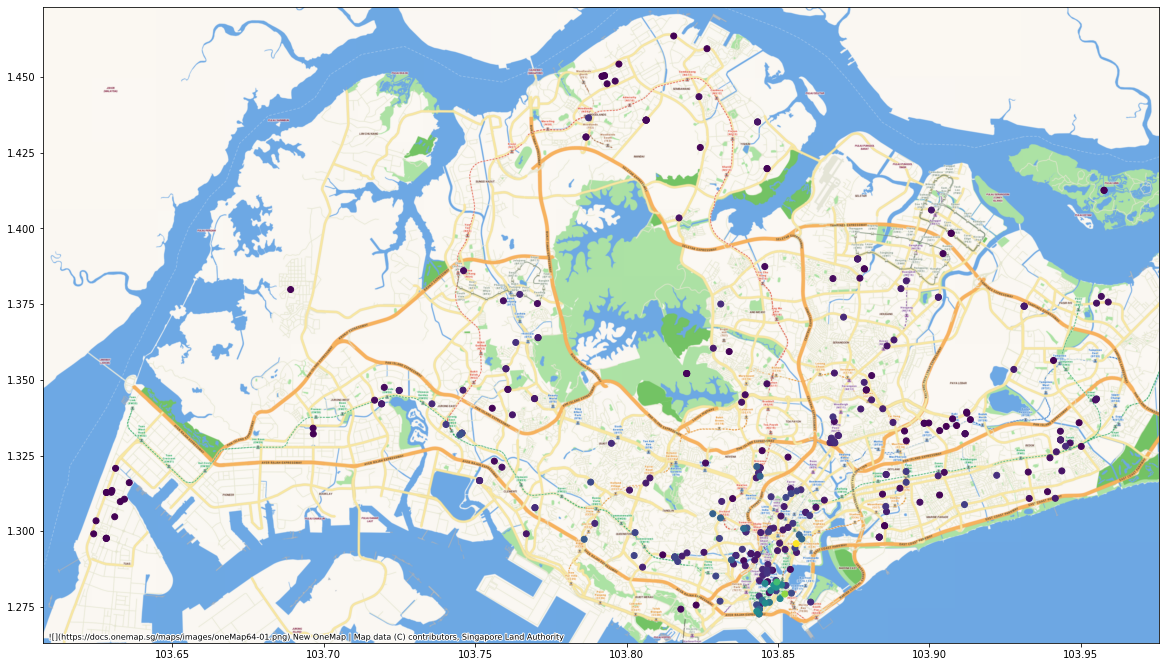

In [59]:
ax = lotsG.plot(column="Price", figsize=(20,20))
ctx.add_basemap(ax,crs="EPSG:4326",source=ctx.providers.OneMapSG.Default,zoom=14)

In [52]:
lots.sort_values("Price")

,Date of Launch,Date of Tender Closing,Date of Award,Location,Type of Development Allowed,Lease (years),Type of Devt Code\n(Click here for explanation),Site Area\n(m2),GPR,GFA\n(m2),No. of Bids,Name of Successful Tenderer,Successful Tender Price,psm per GFA or psm per GPR,Planning Area,Price,Coords
270,27-Aug-97,17-Dec-97,5-Jan-98,Sungei Tengah Road,Farm Produce Centre with market stalls and sup...,20,Others,"23,385.1",NaN,"1,169",2,UBTS Pte Ltd,"$385,000.00",$329.34,Western Water Catchment,16.463475,"[0, 0]"
308,27-Jun-96,9-Oct-96,6-Nov-96,Pulau Ubin,Outdoor Activity Centre and Holiday Accommodation,15,Recreation,"46,713.5",NaN,"7,007",3,Fort Canning Country Club Investment Ltd & All...,"$5,100,000.00",$727.84,North-Eastern Islands,109.176148,"[1.4126, 103.9577]"
307,27-Jun-96,9-Oct-96,6-Nov-96,Pulau Ubin,Holiday Accommodation,15,Recreation,"25,833.0",NaN,"5,167",4,Powerland Holdings Ltd,"$3,288,000.00",$636.35,North-Eastern Islands,127.279062,"[1.4126, 103.9577]"
224,21-Feb-06,18-Apr-06,21-Apr-06,Tuas South Avenue 2 / Tuas South Avenue 3,Business 2,60,Industrial,"36,000.0",1.0,NaN,5,Yee Lee Construction Pte Ltd,"$5,800,000.00",$161.11,Tuas,161.111111,"[1.3207724, 103.631202]"
370,19-Oct-92,9-Feb-93,21-May-93,Tuas South Avenue 4 / Tuas South Avenue 5,General or Light industry,60,Industrial,"102,264.0",1.0,NaN,1,Technology Parks Pte Ltd,"$24,032,000.00",$235.00,Tuas,234.999609,"[1.3105842, 103.6341314]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,25-Oct-95,17-Jan-96,13-Mar-96,Telok Ayer Street / Cross Street,White Site,99,White Site,"3,077.5",NaN,"42,655",3,The Development Bank of Singapore Ltd,"$367,310,736.00","$8,611.20",Downtown Core,119353.610398,"[1.2822, 103.8486]"
71,18-Jun-13,15-Aug-13,19-Aug-13,Cecil Street / Telok Ayer Street,Commercial and open space (residential use wil...,99,Commercial,"7,603.2",NaN,"77,162",4,FC Commercial Trustee Pte. Ltd. (as Trustee-Ma...,"$923,952,040.00","$11,974.18",Downtown Core,121521.469907,"[1.281491, 103.8494135]"
335,31-May-95,23-Aug-95,19-Oct-95,Cecil Street / Church Street,Commercial,99,Commercial,"1,998.5",NaN,"27,700",6,SSL Properties Pte Ltd,"$329,100,000.00","$11,880.87",Downtown Core,164673.505129,"[1.28323, 103.8496]"
199,30-May-07,19-Sep-07,25-Sep-07,Marina View / Commerce Street,White Site (Commercial / Hotel / Residential),99,White Site,"10,238.4",NaN,"133,120",3,MGP Berth Pte. Limited,"$2,018,888,988.00","$15,165.93",Downtown Core,197187.938350,"[1.2792476, 103.8522558]"
